In [ ]:
import sys, os

# ノートブックからプロジェクトのルートを取得
notebook_dir = os.path.dirname(os.path.abspath(__file__)) if "__file__" in globals() else os.getcwd()
project_root = os.path.abspath(os.path.join(notebook_dir, ".."))
sys.path.append(project_root)

# 確認
print("✅ sys.path に追加されたパス:", project_root)

# 関数をインポート
from scripts.QGIS.run_main import run_dlite_algorithm

# 実行
result = run_dlite_algorithm()

✅ sys.path に追加されたパス: /Users/segawamizuto/QGIS_Project
📏 距離: 1045.34 m
🛣️ ノード数: 13
dict_keys(['start', 'goal', 'distance_m', 'route_nodes', 'graph', 'node_positions', 'edge_geom_map', 'route_coords'])


元データのCRS: EPSG:4326


/var/folders/5k/v8xmd75s653ctdg7lhgqr7kw0000gn/T/ipykernel_26976/2279491337.py:41: UserWarning: Glyph 32076 (\N{CJK UNIFIED IDEOGRAPH-7D4C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/5k/v8xmd75s653ctdg7lhgqr7kw0000gn/T/ipykernel_26976/2279491337.py:41: UserWarning: Glyph 36335 (\N{CJK UNIFIED IDEOGRAPH-8DEF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/segawamizuto/QGIS_Project/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32076 (\N{CJK UNIFIED IDEOGRAPH-7D4C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/segawamizuto/QGIS_Project/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36335 (\N{CJK UNIFIED IDEOGRAPH-8DEF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


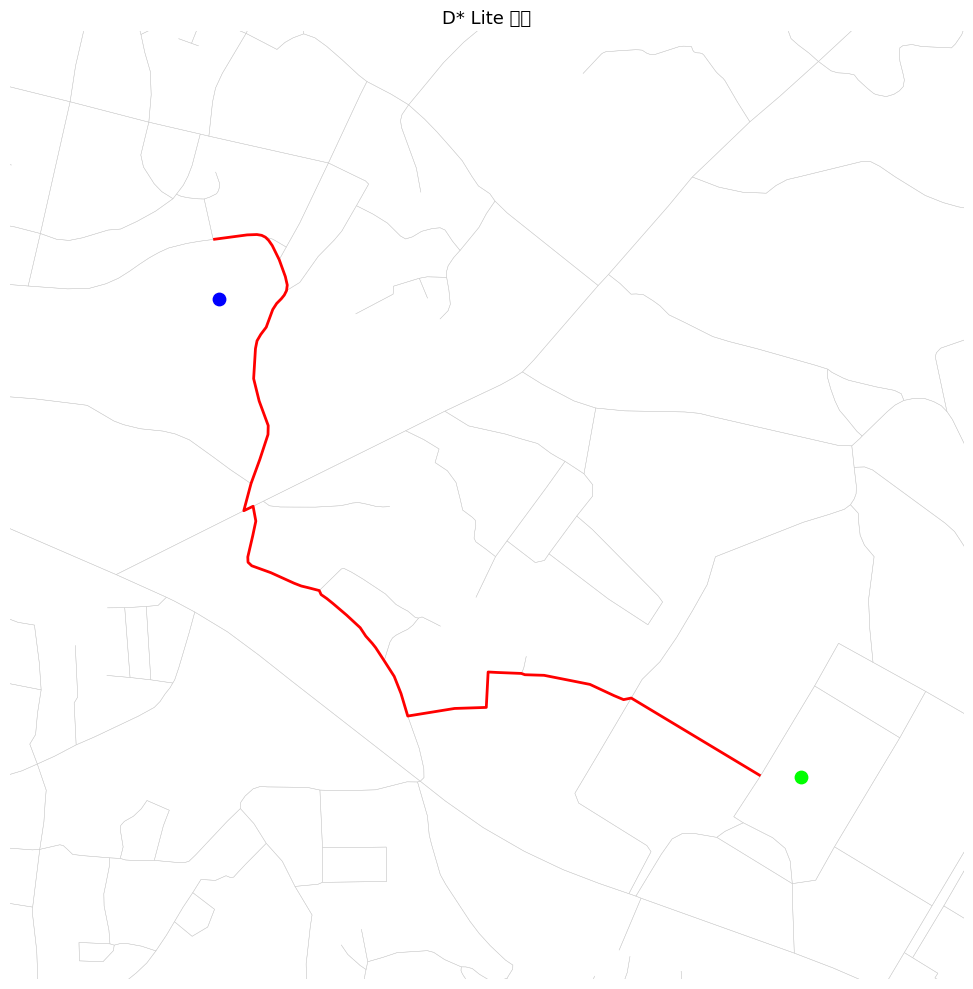

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString, Point

# --- 経路をGeoDataFrame化（元は緯度経度座標） ---
route_line = LineString(result["route_coords"])
start_pt = Point(result["start"].x, result["start"].y)
goal_pt = Point(result["goal"].x, result["goal"].y)

# --- 背景の道路データ ---
roads = gpd.read_file("/Users/segawamizuto/QGIS_Project/data/processed/roads/ube_roads.shp")

# --- データのCRS確認（なければ設定） ---
if roads.crs is None:
    roads = roads.set_crs(epsg=4326)  # 例：WGS84緯度経度

# --- 表示時だけ EPSG:6671 に変換（QGISのプロジェクトCRS相当） ---
roads_view = roads.to_crs(epsg=6671)
route_view = gpd.GeoDataFrame(geometry=[route_line], crs=roads.crs).to_crs(epsg=6671)
start_view = gpd.GeoDataFrame(geometry=[start_pt], crs=roads.crs).to_crs(epsg=6671)
goal_view = gpd.GeoDataFrame(geometry=[goal_pt], crs=roads.crs).to_crs(epsg=6671)

# --- プロット ---
fig, ax = plt.subplots(figsize=(10, 10))
roads_view.plot(ax=ax, color="#cccccc", linewidth=0.3)
route_view.plot(ax=ax, color="red", linewidth=2)
start_view.plot(ax=ax, color="lime", markersize=80)
goal_view.plot(ax=ax, color="blue", markersize=80)

# --- 経路周辺だけを拡大 ---
# route_view は1つのLineStringなので .total_bounds で範囲取得
minx, miny, maxx, maxy = route_view.total_bounds
margin = 200  # メートル単位（EPSG:6671）
ax.set_xlim(minx - margin, maxx + margin)
ax.set_ylim(miny - margin, maxy + margin)

plt.title("D* Lite 経路", fontsize=13)
ax.set_axis_off()
plt.tight_layout()
plt.show()